<a href="https://colab.research.google.com/github/Aynahd/Y24/blob/main/ASSIGNMENT_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AIRPLANES ASSIGNMENT**

Question 1 - Dataset Exploration

Downloaded aiplane jpegs and corresponding bounding box annotation csv files from Kaggle and loaded to Google Colab directory.

In [1]:

# code to load files from local directory to colab

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F985493%2F1664328%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240502%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240502T080517Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3c38936e82cb1a3415c61a52d0a5cce5700e615e186baed52360bd73dd25c692a96ad61164d8918e92dd7c71f5d7d3136743baf343354c4923925a5c90b52938f743f60644c3cc60e4aa2d2949e7c9f49c26df47e0ec2bcfee12e459993472a71c3990473562e88bcff0cdbe446febf785e8913a8079395e03ce6e052f797b59ff70fe942e22acbdeb0bd5b6335a746e3ea1f56b72d82f0dcc3305ba595d1aa50052af12adbd91c63e0983a871bf0440096445b234bab1ae19d66bcdbc3d50e2420c86daa416b97271c5671f5770eeba78006108606d343799081da80203a6fc048300c092c3db65e7ad78f7d22794de4c7c66bd03b83c88ff972503a41332fb'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 12895593 bytes downloaded
Downloaded and uncompressed: 
Data source import complete.


In [2]:
#Loading all necessary libraries
#for prepocessing and analyzing data
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # for plotting
import numpy as np # for linear algebra
import os # for accessing directory structure
import pandas as pd # for data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow_datasets as tfds
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from tqdm import tqdm
import time
import random
#for building the NN model
import tensorflow as tf
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from keras.callbacks import ModelCheckpoint, EarlyStopping



In [3]:
#displays filenames jpeg and csv
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_580.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_695.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_195.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_450.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_603.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_331.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_037.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_305.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_318.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_280.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_532.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_635.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_111.csv
/kaggle/input/Airplanes_A

Dataset exploration- using plotting libraries to see bounding box co ordinates vs numbers.

In [41]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * int(nGraphRow)), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(int(nGraphRow), nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [33]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# 42849.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df= pd.read_csv('/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/42849.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = '42849.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 6 rows and 1 columns


In [34]:
df.head(5)

,6
0,149 110 187 149
1,186 189 202 209
2,68 61 94 94
3,115 75 149 111
4,193 138 230 175


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('6').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('6')):
  _plot_series(series, series_name, i)
  fig.legend(title='6', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['6'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='index', y='6', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

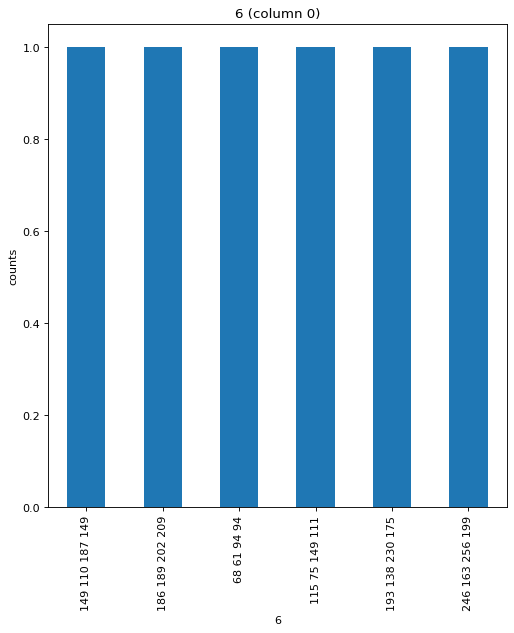

In [42]:
plotPerColumnDistribution(df, 10, 5)

In [55]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# 42849.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df= pd.read_csv('/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/42845.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = '42845.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 4 rows and 1 columns


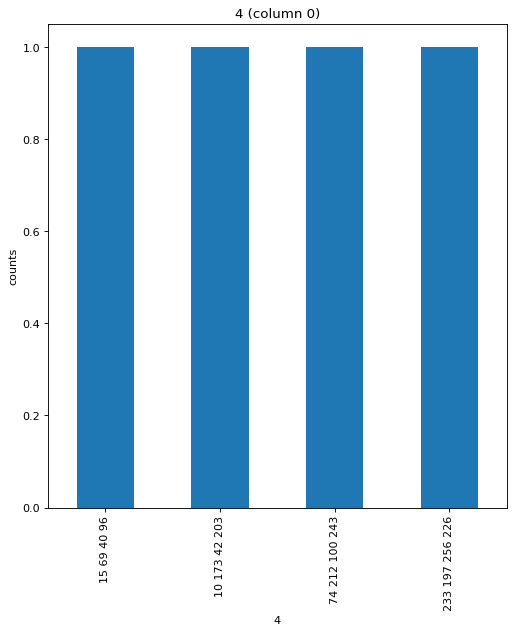

In [57]:
plotPerColumnDistribution(df, 10, 5)

In [69]:
import pandas as pd


# reading the database
data = pd.read_csv("/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_004.csv")

# printing the top 10 rows
display(data.head(10))

,4
0,59 9 111 55
1,112 38 159 88
2,142 75 199 124
3,206 105 256 157


from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('4').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
bb_area = []
bb_area = (bb['x2'] - bb['x1']) * (bb['y2'] - bb['y1'])
bb_area.append(bb_area)

NameError: name 'bb' is not defined

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = bb_area
sns.histplot(x=bb_area, data=data, kde=True, hue='area')

plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'list'>.